In [1]:
#%matplotlib notebook
# Пространственные характеристики излучения генерации лазера с устойчивым 
# резонатором с учетом тепловой линзы в активном элементе.
# вариант 7
#λ, мкм R1, мм R2, мм f, мм L, мм L1, мм D fiber,мкм NA fiber
λ = 0.355 * 10**-6 
R1 = 300 * 10**-3
R2 = 400 * 10**-3
f = 800 * 10**-3
L = 600 * 10**-3
L1 = 250 * 10**-3
D = 200 * 10**-6
NA = 0.22

import math
import numpy as np
from scipy.integrate import odeint
import matplotlib
import matplotlib.pyplot as plt
import numpy

In [2]:
L2 = L - L1
L_STAR = L1 + L2 - L1 * L2 / f
g1 = 1 - L2 / f - L_STAR / R1
g2 = 1 - L1 / f - L_STAR / R2
print("g1 = ", g1)
print("g2 = ", g2)
print("g1 * g2 = ", g1 * g2)

w1 = math.sqrt(λ*L_STAR / 3.14159265358979 * math.sqrt(g2 / (g1 * (1 - g1 * g2) ) ))
w2 = math.sqrt(λ*L_STAR / 3.14159265358979 * math.sqrt(g1 / (g2 * (1 - g1 * g2) ) ))

print("w1 = ", w1)
print("w2 = ", w2)

z0 = R2 / (1 + (R2 / (3.14159265358979 * w2 * w2 / λ))**2)
w0 = math.sqrt( (w2**2 - math.sqrt(w2**4 - 4 * (λ * z0 / 3.14159265358979)**2) )/2 )

print("z0 = ", z0)
print("w0 = ", w0)

O = λ / (3.14159265358979 * w0)

print("O = ", O)

Z_R = 3.14159265358979 * w0**2 / λ
D0 = w0 + 2 * O*z0
print("Z_R = ", Z_R)
print("D0 = ", D0)


g1 =  -1.0729166666666667
g2 =  -0.5390624999999998
g1 * g2 =  0.5783691406249998
w1 =  0.00024600801807535966
w2 =  0.00034706650104415006
z0 =  0.3506287944492628
w0 =  0.00012193252512948627
O =  0.0009267421426337675
Z_R =  0.1315711453273922
D0 =  0.0007718174856034956


In [3]:
z1 = lens1_z = 1
f1 = lens1_f = 1 + 0.350870174

z2 = lens2_z = 2
f2 = lens2_f = 1

def q(z):
    mat1 = 0
    if z < z1:
        mat1 = np.matrix([[1, z], [0, 1]]) 

    elif z < z2 + z1:
        mat1 = np.matrix([[1, z-z1], [0, 1]]) 
        mat1 = mat1 @ np.matrix([[1, 0], [-1/f1, 1]]) 
        mat1 = mat1 @ np.matrix([[1, z1], [0, 1]]) 
    
    else:
        mat1 = np.matrix([[1, z-(z1+z2)], [0, 1]]) 
        mat1 = mat1 @ np.matrix([[1, 0], [-1/f2, 1]]) 
        mat1 = mat1 @ np.matrix([[1, z2], [0, 1]])
        mat1 = mat1 @ np.matrix([[1, 0], [-1/f1, 1]]) 
        mat1 = mat1 @ np.matrix([[1, z1], [0, 1]]) 
        
    A = mat1[0,0]
    B = mat1[0,1]
    C = mat1[1,0]
    D = mat1[1,1]
    return (A * (z0 - 1j * Z_R) + B ) / ( C * (z0 - 1j * Z_R)  + D )
def w(z):
    return math.sqrt(-λ/3.14159265358979 * q(z).imag * (1 + (q(z).real / q(z).imag)**2) )

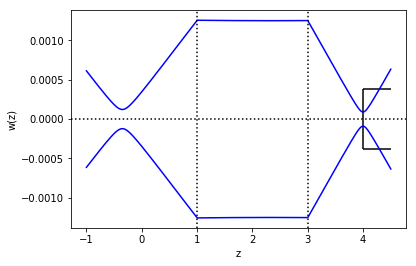

In [10]:
fiberz = 4
z = np.linspace(-1,fiberz+ 0.5,6000)
wz = []
for i in z:
    wz.append(w(i)) 
plt.plot(z, wz, color='b')
plt.plot(z, [-i for i in wz], color='b')

plt.hlines(y = D0 / 2 , xmin=fiberz, xmax=fiberz + 0.5, color='k')
plt.hlines(y = -D0 / 2 , xmin=fiberz, xmax=fiberz + 0.5, color='k')
plt.vlines(x = fiberz , ymin=-D0 / 2, ymax=D0 / 2, color='k')
plt.axvline(x = z1, color='k', linestyle='dotted')
plt.axvline(x = z1+z2, color='k', linestyle='dotted')
plt.axhline(y = 0, color='k', linestyle='dotted')

plt.xlabel("z")
plt.ylabel("w(z)")

plt.show()

In [9]:
print(np.arcsin(NA))
print(np.arctan((wz[4500]-wz[5000])/(z[5000]-z[4500])))

0.22181447049679442
0.001243368877830353
